In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('crops.csv')
print(df)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


<Axes: >

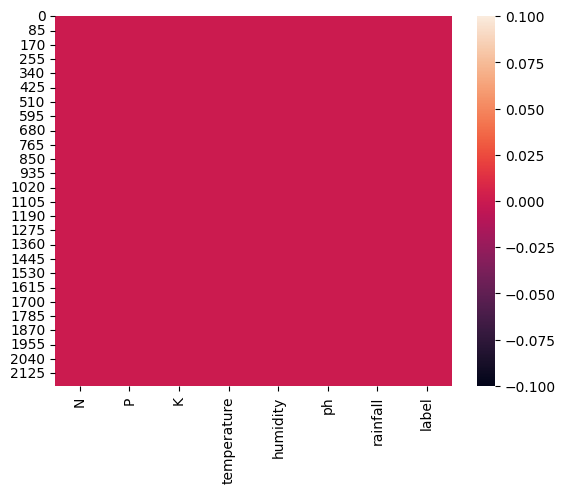

In [37]:
sns.heatmap(df.isnull())

Summer crops


In [38]:
summer = df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique()
print(summer)

['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


Winter crops

In [39]:
winter = df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique()
print(winter)

['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


Monsoon crops

In [40]:
monsoon = df[(df['rainfall'] > 200) & (df['humidity'] > 50)]['label'].unique()
print(monsoon)

['rice' 'papaya' 'coconut']


<Axes: xlabel='N', ylabel='Count'>

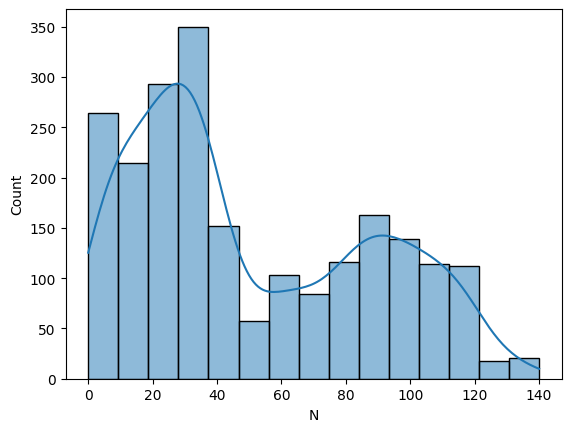

In [41]:
sns.histplot(df['N'], kde = True)

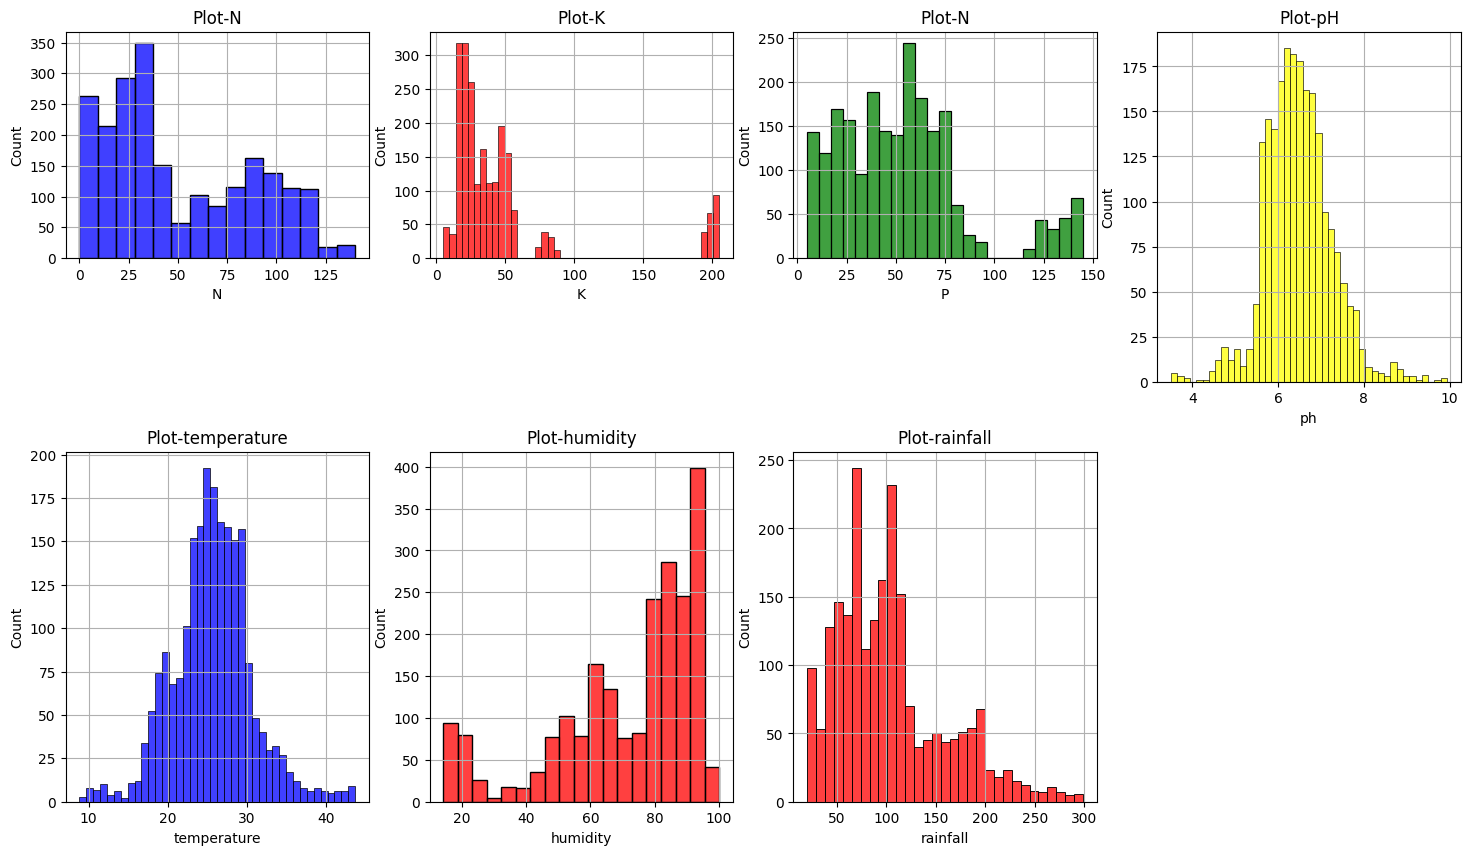

In [42]:
plt.figure(figsize = (18,10))

plt.subplot(3,4,1)
sns.histplot(df['N'], color = 'blue')
plt.title('Plot-N')
plt.grid()

plt.subplot(3,4,2)
sns.histplot(df['K'], color = 'red')
plt.title('Plot-K')
plt.grid()

plt.subplot(3,4,3)
sns.histplot(df['P'], color = 'green')
plt.title('Plot-N')
plt.grid()

plt.subplot(2,4,4)
sns.histplot(df['ph'], color = 'yellow')
plt.title('Plot-pH')
plt.grid()

plt.subplot(2,4,5)
sns.histplot(df['temperature'], color = 'blue')
plt.title('Plot-temperature')
plt.grid()

plt.subplot(2,4,6)
sns.histplot(df['humidity'], color = 'red')
plt.title('Plot-humidity')
plt.grid()

plt.subplot(2,4,7)
sns.histplot(df['rainfall'], color = 'red')
plt.title('Plot-rainfall')
plt.grid()


In [43]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [44]:
def summary(crops=list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("Maximum Nitrogen required: ", x['N'].max())
    print("Minimum Nitrogen required: ", x['N'].min())
    print("Average Nitrogen required: ", x['N'].mean())
    print("-----------------------------------------")
    print("Maximum Potassium required: ", x['P'].max())
    print("Minimum Potassium required: ", x['P'].min())
    print("Average Potassium required: ", x['P'].mean())
    print("-----------------------------------------")
    print("Maximum Sodium required: ", x['K'].max())
    print("Minimum Sodium required: ", x['K'].min())
    print("Average Sodium required: ", x['K'].mean())
    print("-----------------------------------------")
    print("Maximum rainfall required: ", x['rainfall'].max())
    print("Minimum rainfall required: ", x['rainfall'].min())
    print("Average rainfall required: ", x['rainfall'].mean())
    print("-----------------------------------------")
    print("Maximum temperature required: ", x['temperature'].max())
    print("Minimum temperature required: ", x['temperature'].min())
    print("Average temperature required: ", x['temperature'].mean())
    print("-----------------------------------------")
    print("Maximum humidity required: ", x['humidity'].max())
    print("Minimum humidity required: ", x['humidity'].min())
    print("Average humidity required: ", x['humidity'].mean())
    print("-----------------------------------------")
    print("Maximum pH required: ", x['ph'].max())
    print("Minimum pH required: ", x['ph'].min())
    print("Average pH required: ", x['ph'].mean())
    print("-----------------------------------------")


In [45]:
from pandas.core.common import random_state

In [46]:
from sklearn.cluster import KMeans

## K-Means

Dropping labels (for training using K-Means(unsupervised))

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x = df.drop('label', axis = 1)
y = df['label']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

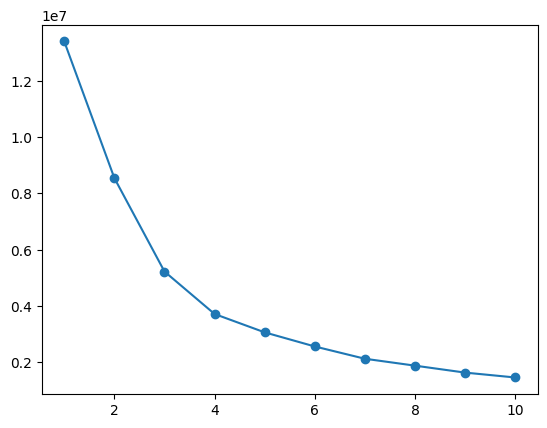

In [50]:
wcss = []
for i in range(1 ,11):
    km = KMeans(n_clusters = i, init="k-means++", max_iter = 2000, n_init = 10, random_state = 42)
    km.fit(X_train)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss, marker = 'o')

In [51]:
km = KMeans(n_clusters = 4, init="k-means++", max_iter = 2000, n_init = 10, random_state = 42)
km.fit(X_train,Y_train)

KMeans(max_iter=2000, n_clusters=4, n_init=10, random_state=42)

In [52]:
y_preds = km.predict(X_test)

In [53]:
a = pd.DataFrame(y_preds)
z = pd.concat([a, df['label']], axis = 1)
z = z.rename(columns = {0:'cluster'})

In [54]:
z

,cluster,label
0,2.0,rice
1,2.0,rice
2,0.0,rice
3,0.0,rice
4,1.0,rice
...,...,...
2195,NaN,coffee
2196,NaN,coffee
2197,NaN,coffee
2198,NaN,coffee


In [55]:
print("Cluster 1", z[z['cluster'] == 0]['label'].unique())

Cluster 1 ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean']


In [56]:
print("Cluster 2", z[z['cluster'] == 1]['label'].unique())

Cluster 2 ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean']


In [57]:
print("Cluster 3", z[z['cluster'] == 2]['label'].unique())

Cluster 3 ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean']


In [58]:
print("Cluster 4", z[z['cluster'] == 3]['label'].unique())

Cluster 4 ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean']


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train, Y_train)

LogisticRegression()

In [62]:
jp = [[40,40,30,40,100,7,200]]
y_pred = model.predict(jp)
print(y_pred)

['coconut']


In [63]:
from sklearn.metrics import classification_report

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))
print(cm)

[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  2  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 30  0  0  0  0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 20  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  4  0  1  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0 28  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

<Axes: >

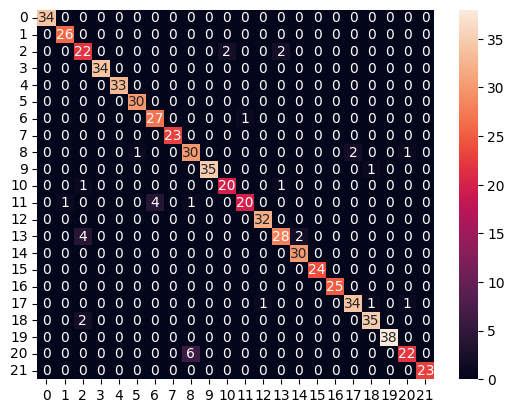

In [65]:
sns.heatmap(cm,annot=True)

In [66]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       0.76      0.85      0.80        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       0.87      0.96      0.92        28
      grapes       1.00      1.00      1.00        23
        jute       0.81      0.88      0.85        34
 kidneybeans       1.00      0.97      0.99        36
      lentil       0.91      0.91      0.91        22
       maize       0.95      0.77      0.85        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.90      0.82      0.86        34
    mungbean       0.94      1.00      0.97        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       0.94    

In [67]:
y=df['label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(np.array([[90,40,40,40,80,7,200]]))
print(pred)


['jute']
